# Import the library

In [1]:
import pandas as pd
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
#from textblob import TextBlob

# load the data from google drive

In [3]:
df = pd.read_csv("C:/Users/haile/OneDrive - University of Bristol/assessment2/50k_reviews.csv")

In [4]:
df.head()

,score,text
0,3.0,good and helpfull read this book is very good ...
1,1.0,Sadly overpriced and irrelevant In spite of it...
2,2.0,Endless rant Howard should have borrowed from ...
3,1.0,Not Quite Hip It's really a shame about the ti...
4,5.0,Journey to the Centre of the Earth Hey! This i...


## map score to sentiment

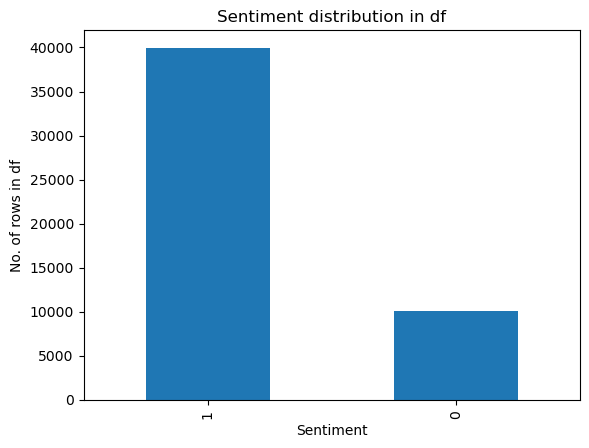

In [6]:
# Function to map stars to sentiment
def map_sentiment(stars_received):
    if stars_received <= 3:
        return 0
    else:
        return 1
# Mapping stars to sentiment into three categories
df['sentiment'] = [ map_sentiment(x) for x in df['score']]
# Plotting the sentiment distribution
plt.figure()
pd.value_counts(df['sentiment']).plot.bar(title="Sentiment distribution in df")
plt.xlabel("Sentiment")
plt.ylabel("No. of rows in df")
plt.show()

In [7]:
df.head()

,score,text,sentiment
0,3.0,good and helpfull read this book is very good ...,0
1,1.0,Sadly overpriced and irrelevant In spite of it...,0
2,2.0,Endless rant Howard should have borrowed from ...,0
3,1.0,Not Quite Hip It's really a shame about the ti...,0
4,5.0,Journey to the Centre of the Earth Hey! This i...,1


# Data Preprocessing

In this session, we have performed various pre-processing steps on the dataset that mainly dealt with removing NA, abbreviation and stopwords. The text document is then converted into the lowercase for better generalization.

Subsequently, the punctuations were cleaned and removed thereby reducing the unnecessary noise from the dataset. After that, we have also removed the repeating characters from the words.

After the tokenization, we then performed Lemmatization(reducing the derived words to their root form known as lemma) with limitation of part of speech for better results.

## data cleaning

### drop line with NA

In [11]:
df.dropna (axis= 0 ,how= 'any',inplace=True)
df.head()

,score,text,sentiment
0,3.0,good and helpfull read this book is very good ...,0
1,1.0,Sadly overpriced and irrelevant In spite of it...,0
2,2.0,Endless rant Howard should have borrowed from ...,0
3,1.0,Not Quite Hip It's really a shame about the ti...,0
4,5.0,Journey to the Centre of the Earth Hey! This i...,1


In [9]:
df.isna().sum()

score        0
text         0
sentiment    0
dtype: int64

In [15]:
import nltk
from nltk.stem import WordNetLemmatizer
lemma = WordNetLemmatizer()
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\haile\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Making statement text in lower case

In [64]:
df['text']=df['text'].str.lower()
df['text'].head()

0    good and helpfull read this book is very good ...
1    sadly overpriced and irrelevant in spite of it...
2    endless rant howard should have borrowed from ...
3    not quite hip it's really a shame about the ti...
4    journey to the centre of the earth hey! this i...
Name: text, dtype: object

### Restore common acronyms

In [65]:
def restore_common_abbr(caption):
    pat_is = re.compile("(it|he|she|that|this|there|here)(\'s)", re.I)
    pat_s = re.compile("(?<=[a-zA-Z])\'s")  
    pat_s2 = re.compile("(?<=s)\'s?")
    pat_not = re.compile("(?<=[a-zA-Z])n\'t")  # not abbreviation
    pat_would = re.compile("(?<=[a-zA-Z])\'d")  # would abbreviation
    pat_will = re.compile("(?<=[a-zA-Z])\'ll")  # will abbreviation
    pat_am = re.compile("(?<=[I|i])\'m")  # am abbreviation
    pat_are = re.compile("(?<=[a-zA-Z])\'re")  # are abbreviation
    pat_ve = re.compile("(?<=[a-zA-Z])\'ve")  # have abbreviation

    new_text = caption
    new_text = pat_is.sub(r"\1 is", new_text)
    new_text = pat_s.sub("", new_text)
    new_text = pat_s2.sub("", new_text)
    new_text = pat_not.sub(" not", new_text)
    new_text = pat_would.sub(" would", new_text)
    new_text = pat_will.sub(" will", new_text)
    new_text = pat_am.sub(" am", new_text)
    new_text = pat_are.sub(" are", new_text)
    new_text = pat_ve.sub(" have", new_text)
    new_text = new_text.replace('\'', ' ')
    return new_text

In [66]:
df['text']= df['text'].apply(lambda x: restore_common_abbr(x))
df['text'].head()

0    good and helpfull read this book is very good ...
1    sadly overpriced and irrelevant in spite of it...
2    endless rant howard should have borrowed from ...
3    not quite hip it is really a shame about the t...
4    journey to the centre of the earth hey! this i...
Name: text, dtype: object

In [55]:
#not sure how to deal with 'not'. I try to connect the 'not' with the word after it. But it's unreasonable for some phrases like 'not quite' and 'not very'. So I decided to keep these negative words. 
df = pd.DataFrame({'comment':['aaa bbb ccc not verb ddd']}) 

df.comment.str.replace(r'\b(not\s)', 'not_')


C:\Users\haile\AppData\Local\Temp\ipykernel_19492\3512008643.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df.comment.str.replace(r'\b(not\s)', 'not_')


0    aaa bbb ccc not_verb ddd
Name: comment, dtype: object

### Cleaning and removing the above stop words list from the text

In [19]:
STOPWORDS = set(stopwords.words('english'))
print(STOPWORDS)

{'have', 'my', 'so', 're', 'any', 'only', 'haven', 'between', 'be', 'am', "hadn't", 'its', 've', 'needn', 'you', 'doing', "don't", 'she', 'all', 'against', 'me', 'were', 'y', 'theirs', 'hadn', 'myself', 'should', "didn't", 'our', 'themselves', "should've", "you'd", 'where', 'a', 'hers', 'here', 'are', 'didn', 'below', 'is', 'this', 'ma', "that'll", "mustn't", 'weren', 'wouldn', 'their', 'ours', 'don', 'other', 'same', "won't", 'more', 'how', "isn't", 'few', 'than', 'too', 'in', 'if', 'yours', 'ain', 'yourself', "wouldn't", 'those', "she's", 'until', 'i', 'itself', 'has', 'shouldn', 'your', 'own', 'under', 'further', 'again', 'm', 'but', 'won', 'over', 'no', 'mustn', 'that', 'while', 'during', 'to', 'above', 'such', 'will', 'shan', "wasn't", 'him', 'them', 'was', 'he', 'yourselves', 'there', 'herself', 'for', "doesn't", "couldn't", 'doesn', 'not', 'did', 'hasn', 'with', 'some', 'into', 'does', 'nor', 'o', "needn't", 'and', 'most', 'his', 'having', 'after', "you've", 'the', 'they', 'then

In [67]:
#create our new stopoing words to keep some words like 'not'  
my_stopwords ={'have', 'my', 'so', 're', 'any', 'only', 'haven', 'between', 'be', 'am', "hadn't", 'its', 've', 'needn', 'you', 'doing', "don't", 'she', 'all', 'against', 'me', 'were', 'y', 'theirs', 'hadn', 'myself', 'should', "didn't", 'our', 'themselves', "should've", "you'd", 'where', 'a', 'hers', 'here', 'are', 'didn', 'below', 'is', 'this', 'ma', "that'll", "mustn't", 'weren', 'wouldn', 'their', 'ours', 'don', 'other', 'same', "won't", 'more', 'how', "isn't", 'few', 'than', 'too', 'in', 'if', 'yours', 'ain', 'yourself', "wouldn't", 'those', "she's", 'until', 'i', 'itself', 'has', 'shouldn', 'your', 'own', 'under', 'further', 'again', 'm', 'but', 'won', 'over', 'no', 'mustn', 'that', 'while', 'during', 'to', 'above', 'such', 'will', 'shan', "wasn't", 'him', 'them', 'was', 'he', 'yourselves', 'there', 'herself', 'for', "doesn't", "couldn't", 'doesn', 'did', 'hasn', 'with', 'some', 'into', 'does', 'nor', 'o', "needn't", 'and', 'most', 'his', 'having', 'after', "you've", 'the', 'they', 'then', 'isn', "shan't", 'once', 't', 'it', "shouldn't", 'been', 'can', 'being', 'of', 'about', 'just', 'down', "hasn't", 'now', 'ourselves', 'd', 'up', 'her', 'had', 'aren', 'what', 'from', "you'll", 'each', 'we', 'whom', "mightn't", 'do', 'because', 'through', 's', "weren't", 'himself', 'who', 'both', 'an', 'by', 'when', 'at', 'as', 'off', 'very', 'these', 'or', "it's", 'mightn', 'before', "you're", "haven't", 'on', 'why', 'll', 'which', 'wasn', "aren't", 'couldn', 'out'}

In [68]:
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in my_stopwords])
df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))
df['text'].head()

0    good helpfull read book good type thats findin...
1    sadly overpriced irrelevant spite claim "illus...
2    endless rant howard borrowed dennis miller sta...
3    not quite hip really shame time reserch went t...
4    journey centre earth hey! great book! absolute...
Name: text, dtype: object

### Cleaning and removing punctuations

In [69]:
exclude = set('"#$%&\()*+-/:<=>@[\\]^_`{|}!?,.')
def cleaning_punctuations(lines):
    line = ' '.join(''.join(' ' if ch in exclude else ch for ch in lines).split())
    return line
df['text']=df['text'].apply(lambda x: cleaning_punctuations(x))


In [70]:
df['text'].head()

0    good helpfull read book good type thats findin...
1    sadly overpriced irrelevant spite claim illust...
2    endless rant howard borrowed dennis miller sta...
3    not quite hip really shame time reserch went t...
4    journey centre earth hey great book absolutely...
Name: text, dtype: object

### Cleaning and removing repeating characters

In [71]:
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df['text'] = df['text'].apply(lambda x: cleaning_repeating_char(x))
df['text'].head()

0    good helpfull read book good type thats findin...
1    sadly overpriced irrelevant spite claim illust...
2    endless rant howard borrowed dennis miller sta...
3    not quite hip really shame time reserch went t...
4    journey centre earth hey great book absolutely...
Name: text, dtype: object

### Cleaning and removing Numeric numbers

In [72]:
def cleaning_numbers(data):
    return re.sub('[0-9]+', ' ', data)
df['text'] = df['text'].apply(lambda x: cleaning_numbers(x))
df['text'].head()

0    good helpfull read book good type thats findin...
1    sadly overpriced irrelevant spite claim illust...
2    endless rant howard borrowed dennis miller sta...
3    not quite hip really shame time reserch went t...
4    journey centre earth hey great book absolutely...
Name: text, dtype: object

### Remove short words

In [73]:
def transform_text(text):
    return ' '.join([word for word in text.split() if len(word) > 2])#length should be greater than 2
df['text'] = df['text'].apply(lambda x: transform_text(x))
df['text'].head() 

0    good helpfull read book good type thats findin...
1    sadly overpriced irrelevant spite claim illust...
2    endless rant howard borrowed dennis miller sta...
3    not quite hip really shame time reserch went t...
4    journey centre earth hey great book absolutely...
Name: text, dtype: object

## Tokenization

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\haile\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [74]:
from nltk import word_tokenize
df['text']=df['text'].apply(lambda x: word_tokenize(x))

In [75]:
df['text'].head()

0    [good, helpfull, read, book, good, type, thats...
1    [sadly, overpriced, irrelevant, spite, claim, ...
2    [endless, rant, howard, borrowed, dennis, mill...
3    [not, quite, hip, really, shame, time, reserch...
4    [journey, centre, earth, hey, great, book, abs...
Name: text, dtype: object

### Applying Lemmatizer

In [25]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\haile\AppData\Roaming\nltk_data...


True

In [26]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\haile\AppData\Roaming\nltk_data...


True

In [28]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\haile\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [76]:
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

# get the part of speech
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def tag_lem(doc,lemmatizer):
    if doc[-1] != '.':
        doc.append('.')
    tagged_sent = pos_tag(doc)  # get the part of speech

    new_s = []
    for c in tagged_sent:
        if c[0].isdigit():
            new_s.append("#number")
        elif c[0] not in string.punctuation:
            wordnet_pos = get_wordnet_pos(c[1]) or wordnet.NOUN
            new_s.append(lemmatizer.lemmatize(c[0], pos=wordnet_pos))  
    return new_s

lemmatizer = WordNetLemmatizer()

df['text'] = df['text'].apply(lambda x: tag_lem(x,lemmatizer))
df['text'].head()

0    [good, helpfull, read, book, good, type, thats...
1    [sadly, overprice, irrelevant, spite, claim, i...
2    [endless, rant, howard, borrow, dennis, miller...
3    [not, quite, hip, really, shame, time, reserch...
4    [journey, centre, earth, hey, great, book, abs...
Name: text, dtype: object

In [32]:
#test
tag_lem(['borrowed','cats','facing'],lemmatizer)

['borrow', 'cat', 'face']

In [77]:
df.to_csv("data_cleaned_1.csv")

In [78]:
df.to_pickle("data_cleaned_1")

## visualization

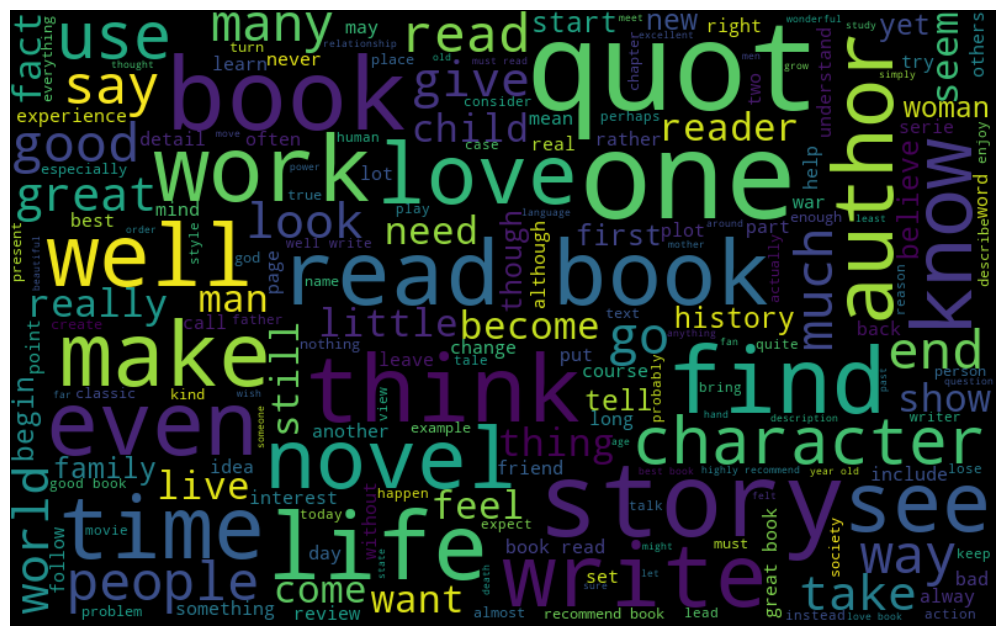

In [79]:
df['combine']=df['text'].apply(lambda x: ' '.join(x))
all_words = " ".join(sent for sent in df['combine'])

from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=100).generate(all_words)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## find the words with high frequency

In [37]:
words = all_words.split()
counts = {}  
for word in words:
    counts[word] = counts.get(word, 0) + 1 
items = list(counts.items())
items.sort(key=lambda x: x[1], reverse=True)
for i in range(30):
    word, count = items[i] 
    print ("{0:<10}{1:>5}".format(word, count))



book      113091
not       72980
read      50968
one       32479
story     25187
like      21686
would     20633
time      20164
great     20014
make      19779
good      18890
write     18052
get       18040
find      16466
character 16459
love      16357
life      15273
well      15208
think     14710
novel     13835
first     13097
many      13004
much      12239
know      12226
work      12009
people    11784
take      11658
also      11610
way       11574
give      11409
